In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [156]:
churn = pd.read_excel(r"C:\Users\david\Desktop\MASTER\APRENDIZAJE_AUTOMATICO\practica\APRENDIZAJE-AUTOMATICO-PRACTICA\Telco_customer_churn.xlsx")

In [157]:
churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [158]:
churn.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [159]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [160]:
churn.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [ ]:
churn = churn.drop(columns = ['State','Country','Zip Code', 'Lat Long','CLTV'])

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64


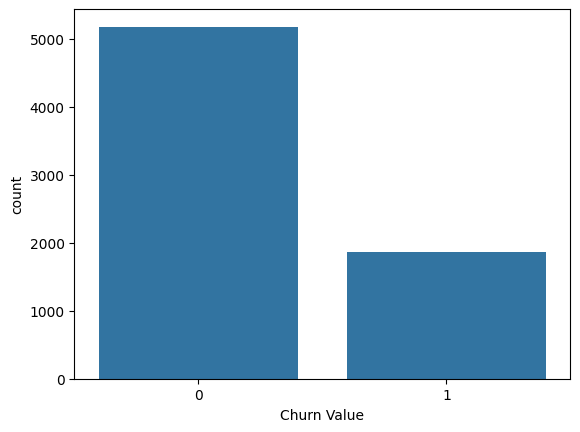

In [161]:
print(churn['Churn Value'].value_counts(normalize=True))

sns.countplot(data = churn, x = churn['Churn Value'])
plt.show()

In [162]:
churn.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [163]:
churn['City'].nunique()

1129

In [164]:
recuento_ciudades_con_mas_clientes = churn.groupby(['City'])['Count'].sum().reset_index().nlargest(20,columns='Count')
lista_ciudades = list(recuento_ciudades_con_mas_clientes['City'].unique())
recuento_ciudades_con_mas_clientes

,City,Count
562,Los Angeles,305
869,San Diego,150
878,San Jose,112
855,Sacramento,108
872,San Francisco,104
354,Fresno,64
556,Long Beach,60
702,Oakland,52
972,Stockton,44
56,Bakersfield,40


In [165]:
churn_grafico = churn[churn['City'].isin(lista_ciudades)]

# Clientes que se van y se quedan de las 30 ciudades con mas clientes

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250')])

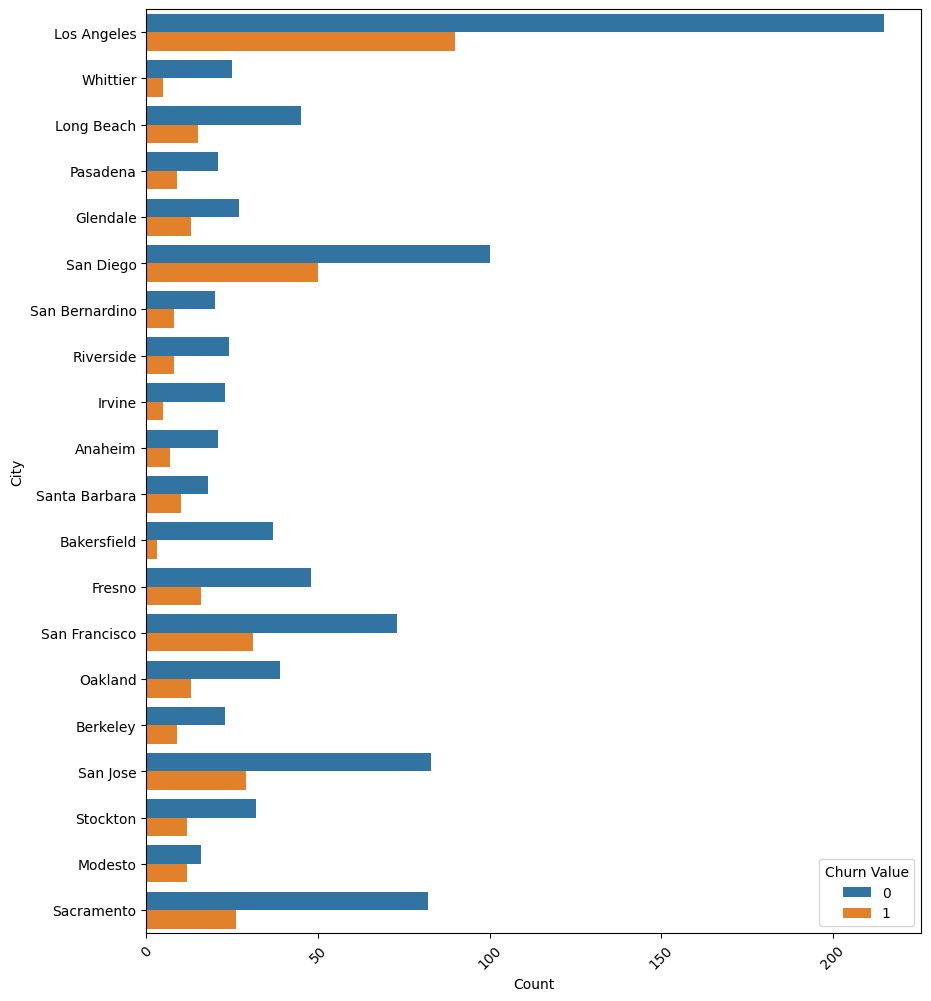

In [166]:
plt.figure(figsize = (10,12))
sns.barplot(data = churn_grafico, x = 'Count', y='City', estimator='sum', hue='Churn Value')
plt.xticks(rotation = 45)

In [167]:
total = churn.groupby('City').agg(total = ('Count','sum')).reset_index()
total

,City,total
0,Acampo,4
1,Acton,4
2,Adelanto,5
3,Adin,4
4,Agoura Hills,5
...,...,...
1124,Yreka,4
1125,Yuba City,8
1126,Yucaipa,4
1127,Yucca Valley,5


In [168]:
clientes_que_se_van = churn[churn['Churn Value'] == 1]

In [169]:
agrupacion_Se_van = clientes_que_se_van.groupby('City').agg(se_van = ('Count','sum')).reset_index()
total
agrupacion_Se_van

,City,se_van
0,Acampo,3
1,Adelanto,1
2,Adin,2
3,Agoura Hills,2
4,Aguanga,1
...,...,...
828,Yorkville,1
829,Yosemite National Park,2
830,Yuba City,2
831,Yucaipa,1


In [170]:
total = total.merge(agrupacion_Se_van, how = 'left',left_on='City', right_on = 'City')
total['proporcion'] = (total['se_van']/total['total']) * 100


In [171]:
total = total[total['City'].isin(lista_ciudades)].sort_values(by='proporcion',ascending = False)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45')])

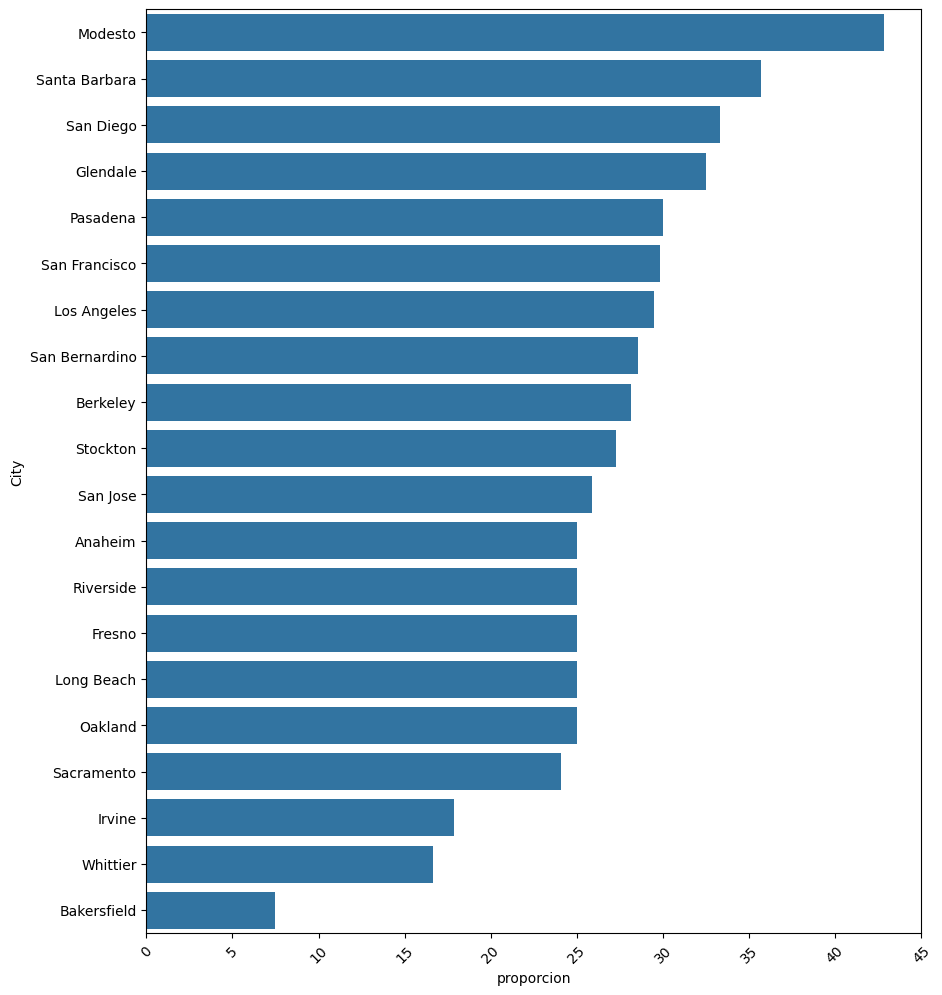

In [172]:
plt.figure(figsize = (10,12))
sns.barplot(data = total, x = 'proporcion', y='City', estimator='sum')
plt.xticks(rotation = 45)

In [173]:
columnas = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',]

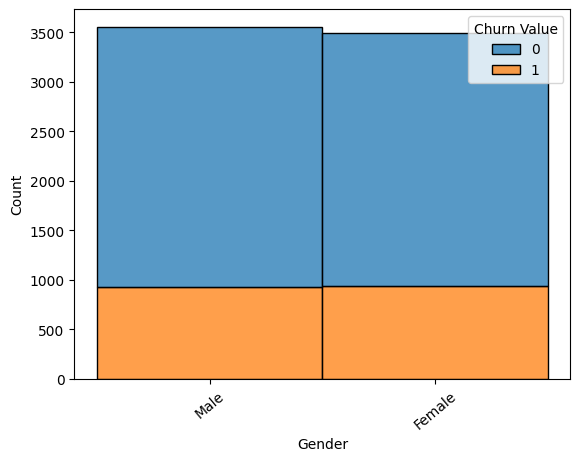

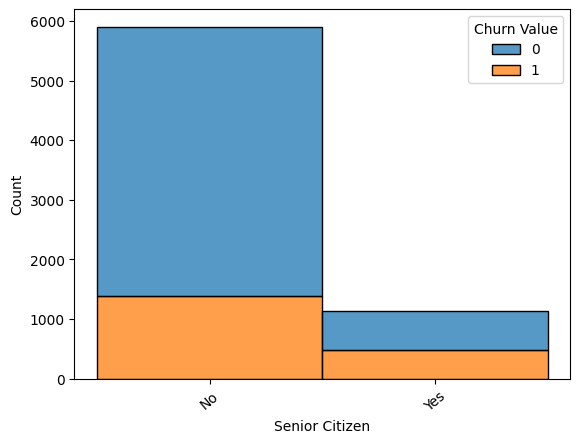

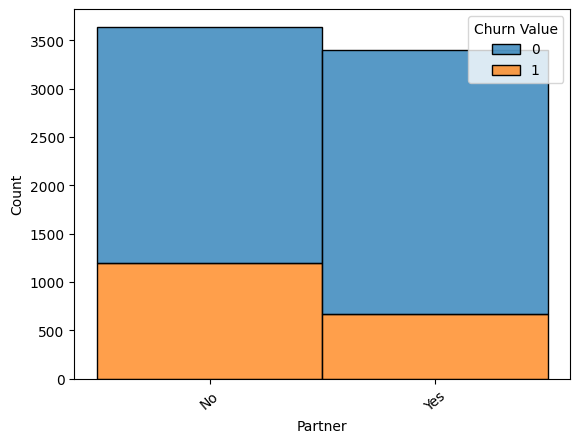

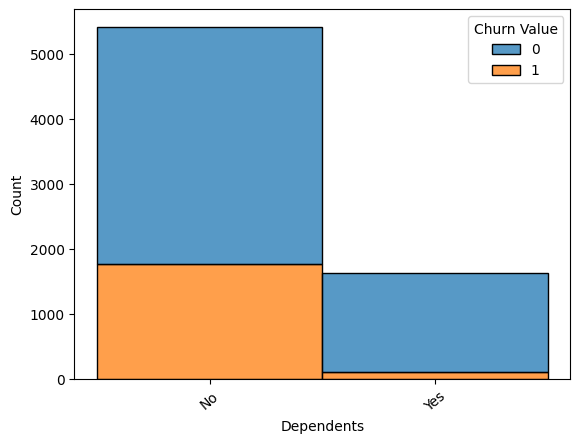

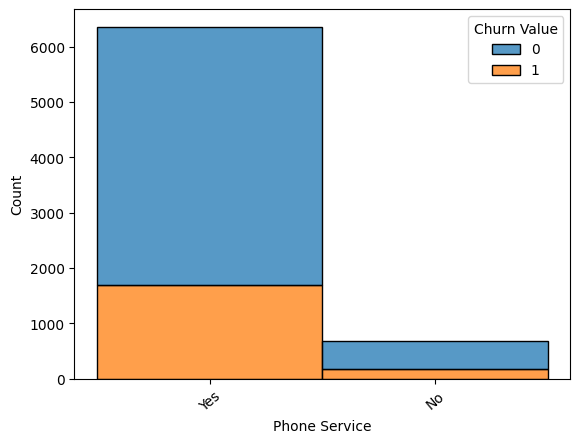

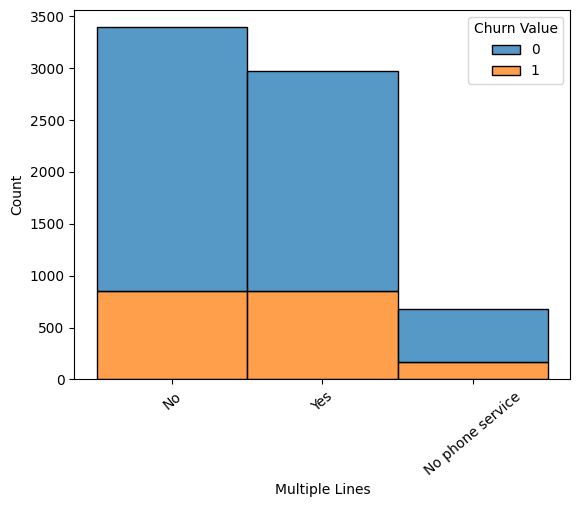

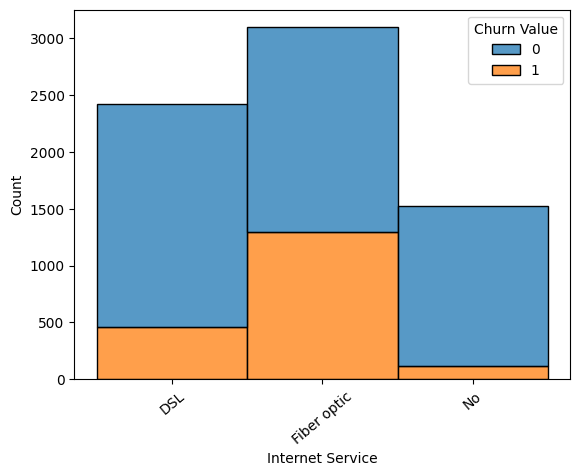

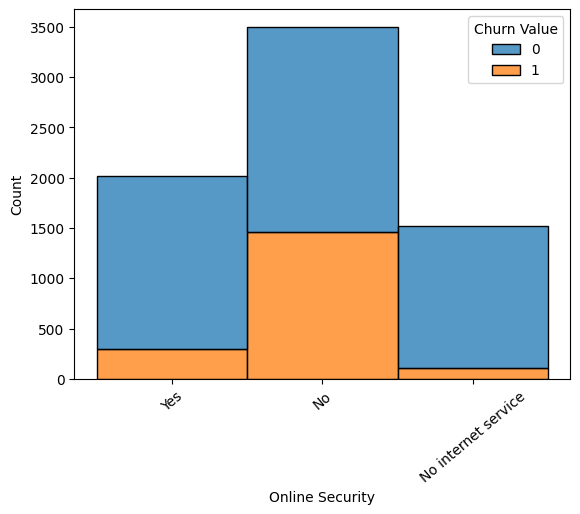

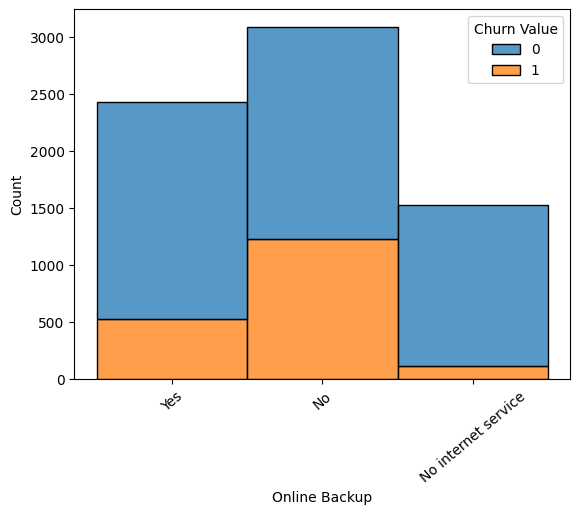

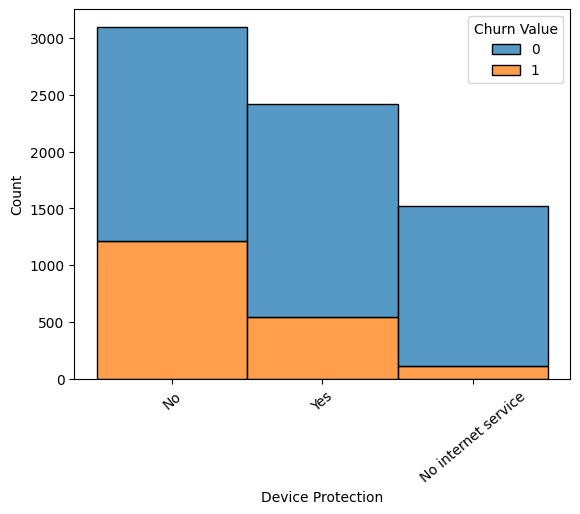

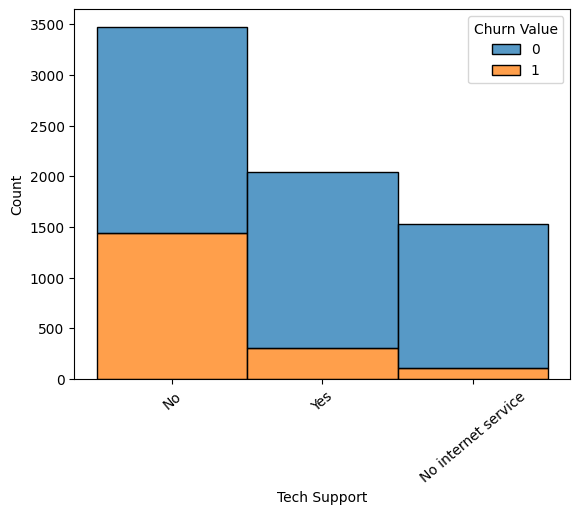

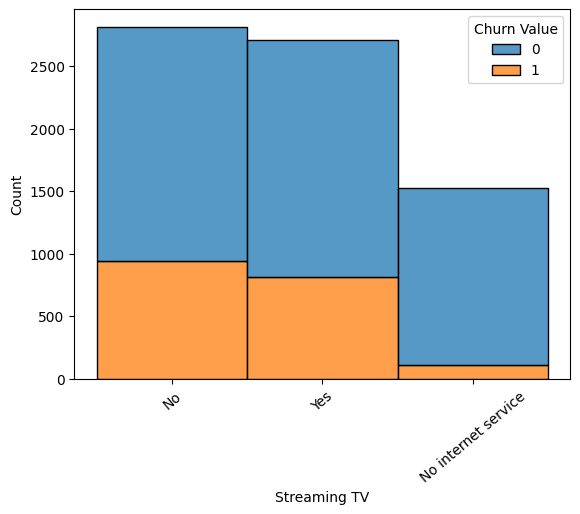

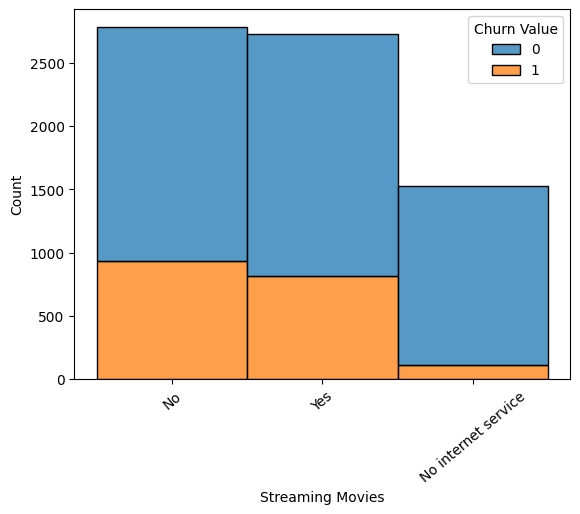

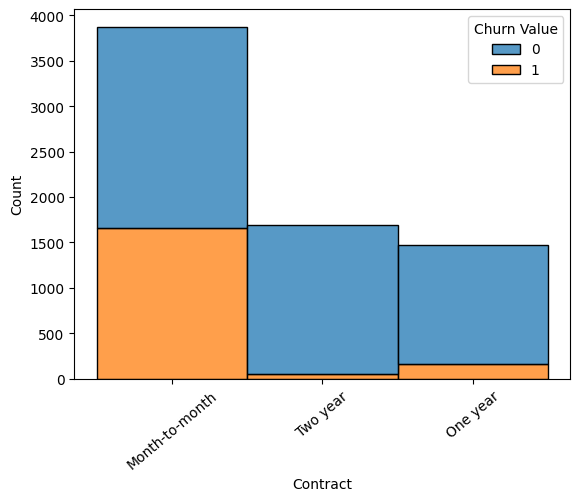

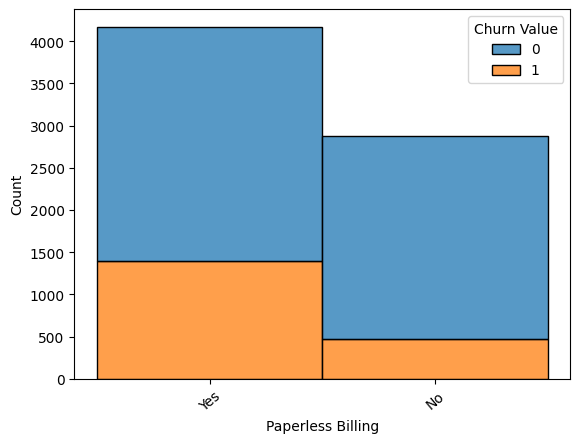

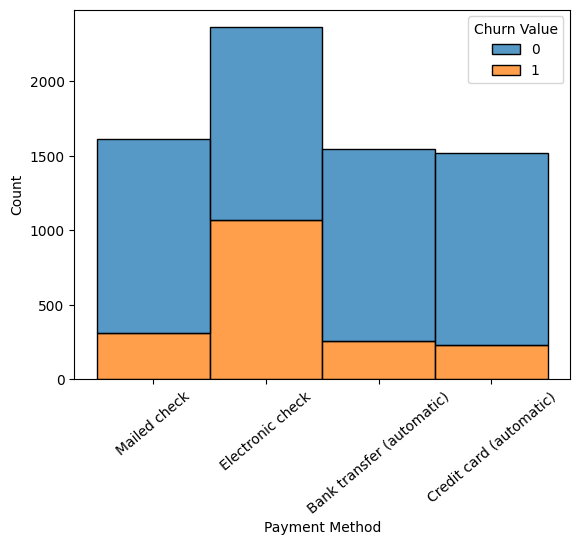

In [174]:
for n in columnas:
    sns.histplot(data = churn, x = n, hue = churn['Churn Value'],multiple="stack")
    plt.xticks(rotation = 40)
    plt.show()

In [175]:
le = LabelEncoder()

for n in columnas:
    churn[n] = le.fit_transform(churn[n])

In [176]:
churn.describe()

,Count,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,0.504756,0.162147,0.483033,0.231010,32.371149,0.903166,...,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,0.500013,0.368612,0.499748,0.421508,24.559481,0.295752,...,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,1.000000,0.000000,1.000000,0.000000,55.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000,100.000000,6500.000000


In [177]:
y = churn['Churn Value']
x = churn[columnas]

X_train,X_Test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,shuffle = True)

In [178]:
modelo = LogisticRegression()
modelo.fit(X_train,Y_train)
y_pred = modelo.predict(X_Test)

In [179]:
arbolito = DecisionTreeClassifier()
arbolito.fit(X_train,Y_train)
y_pred = arbolito.predict(X_Test)

0.6676768436467241


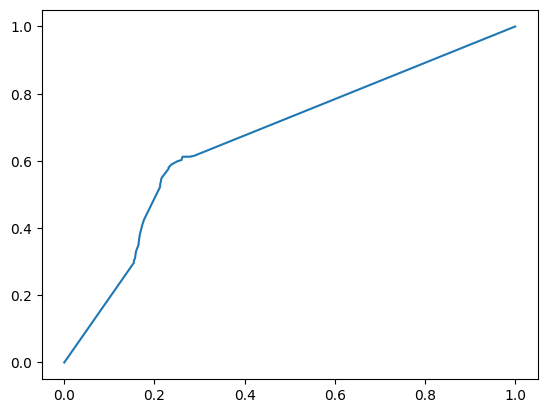

In [180]:
y_test_proba_arbolito = arbolito.predict_proba(X_Test)[:,1]
valor_arbolito = roc_auc_score(Y_test,y_test_proba_arbolito)
a_Arbolito,b_Arbolito,_ = roc_curve(Y_test,y_test_proba_arbolito)
print(valor_arbolito)
plt.plot(a_Arbolito,b_Arbolito)

0.8221697716705083


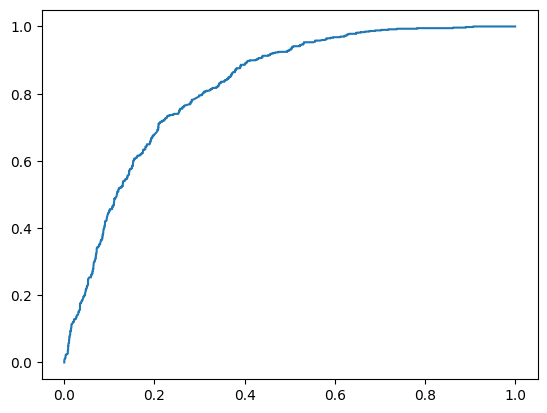

In [181]:
y_test_proba = modelo.predict_proba(X_Test)[:,1]
valor = roc_auc_score(Y_test,y_test_proba)
a,b,_ = roc_curve(Y_test,y_test_proba)
print(valor)
plt.plot(a,b)

<Axes: >

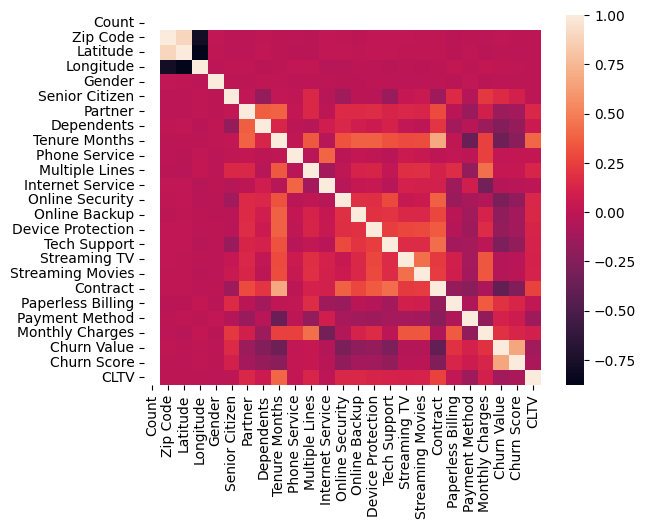

In [182]:
correlaciones = churn.corr(numeric_only=True)
sns.heatmap(data  = correlaciones)